In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, probplot
import matplotlib.pyplot as plt
import seaborn as sns
import rich

In [3]:
data_df = pd.read_csv("big5_training_data.csv", header = 0, index_col = 0)
training_sentences_embeddings = data_df.iloc[:,1:].values
dimensions_name = data_df.columns[1:]
dimension_personality_dict = {"ope_z": "Openness", "con_z": "Conscientiousness", "ext_z": "Extroversion", "agr_z": "Agreeableness", "neu_z": "Neuroticism"}
dimensions_name = [dimension_personality_dict[item] for item in dimensions_name]
means = np.mean(training_sentences_embeddings, axis = 0)
stds = np.std(training_sentences_embeddings, axis = 0)

In [4]:
dimensions_name

['Openness',
 'Conscientiousness',
 'Extroversion',
 'Agreeableness',
 'Neuroticism']

In [5]:
data_df.iloc[1].to_dict()

{'message': "perhaps he loved everyone but me. nbut that makes me special, doesn't it?",
 'ope_z': 0.8961686206463537,
 'con_z': 0.4931965726399846,
 'ext_z': -0.4145939852707033,
 'agr_z': 0.3373677421234988,
 'neu_z': 0.3933118233138519}

In [6]:
means

array([-4.74700418e-17, -2.77062501e-17, -1.90249584e-17,  1.15988438e-17,
        1.72450417e-17])

In [7]:
stds

array([0.99999882, 0.99999882, 0.99999882, 0.99999882, 0.99999882])

In [8]:
training_sentences_embeddings[2]

array([ 0.21327552,  0.17603608,  0.32828532,  0.27471343, -0.21107172])

In [9]:
df = data_df[['ope_z', 'con_z', 'ext_z', 'agr_z', 'neu_z']]

In [10]:
print(df.describe())

              ope_z         con_z         ext_z         agr_z         neu_z
count  8.463040e+05  8.463040e+05  8.463040e+05  8.463040e+05  8.463040e+05
mean  -4.747004e-17 -2.770625e-17 -1.902496e-17  1.159884e-17  1.724504e-17
std    9.999994e-01  9.999994e-01  9.999994e-01  9.999994e-01  9.999994e-01
min   -1.791328e+01 -1.606235e+01 -1.647491e+01 -2.421485e+01 -9.958985e+00
25%   -5.990037e-01 -5.480083e-01 -5.593109e-01 -4.808781e-01 -5.858125e-01
50%   -6.985836e-02  5.923059e-02  4.827777e-03  1.119149e-01 -1.141641e-01
75%    5.346785e-01  5.938862e-01  5.516231e-01  5.968365e-01  4.446708e-01
max    1.507327e+01  2.519352e+01  2.000737e+01  1.254866e+01  3.199032e+01


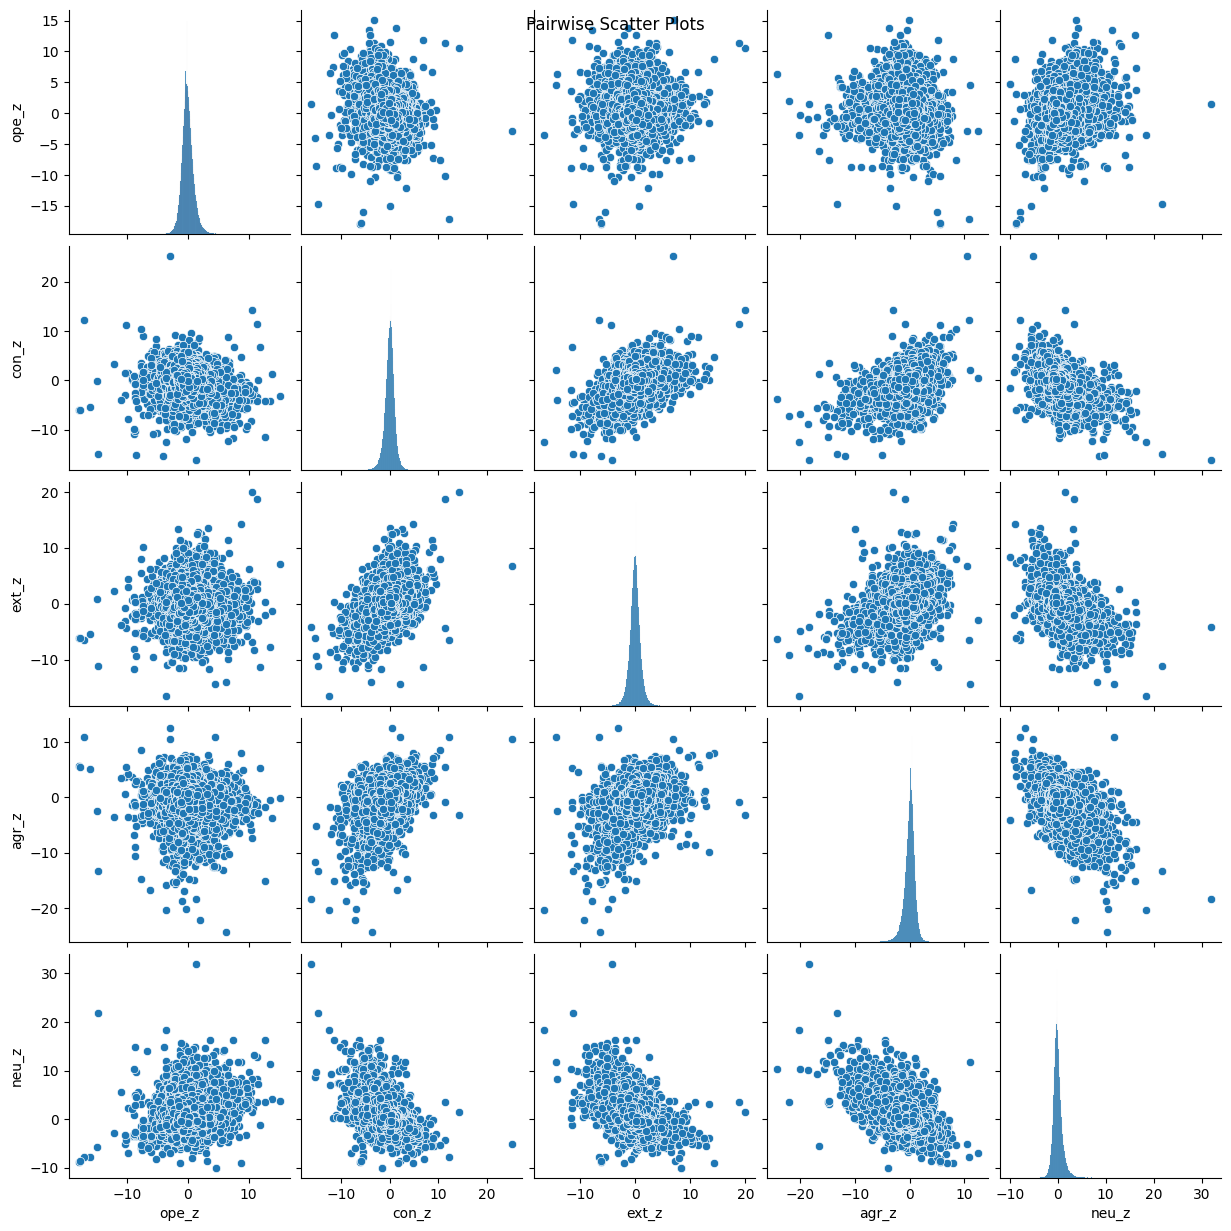

In [11]:
# Correlation metric before 

sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

In [12]:
# Correlation metric after filter

sns.pairplot(filtered_df)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

NameError: name 'filtered_df' is not defined

In [18]:
z_threshold = 10

mask = np.abs(df) <= z_threshold

filtered_df = df[mask.all(axis=1)]

print(filtered_df.describe())

               ope_z          con_z          ext_z          agr_z  \
count  807530.000000  807530.000000  807530.000000  807530.000000   
mean       -0.025666       0.046775       0.018018       0.049337   
std         0.893359       0.884369       0.880834       0.856783   
min        -2.999920      -2.999503      -2.999991      -2.999910   
25%        -0.593042      -0.493768      -0.521688      -0.436969   
50%        -0.077956       0.081802       0.017621       0.126578   
75%         0.504730       0.600115       0.546968       0.596886   
max         2.999931       2.999991       2.999985       2.999544   

               neu_z  
count  807530.000000  
mean       -0.058721  
std         0.828500  
min        -2.998828  
25%        -0.584592  
50%        -0.130371  
75%         0.394428  
max         2.999992  


In [23]:
filtered_df

,ope_z,con_z,ext_z,agr_z,neu_z
message_id,,,,,
tweet_143508,-0.300409,0.459249,0.294330,0.452765,-0.894041
tweet_425070,0.896169,0.493197,-0.414594,0.337368,0.393312
tweet_502775,0.213276,0.176036,0.328285,0.274713,-0.211072
tweet_600640,-0.711772,1.284832,-1.013234,0.611918,0.545335
blog_79108,1.837614,0.042504,-0.460709,0.061335,1.808086
...,...,...,...,...,...
blog_46845,0.076771,-0.211666,0.577826,0.861935,-0.708217
tweet_611609,-1.700926,1.092124,1.216876,1.034062,-0.978274
blog_107867,2.278704,0.275908,0.107220,-1.885664,-0.970312


In [21]:
df.shape

(846304, 5)

In [22]:
filtered_df.shape

(807530, 5)

In [27]:
filtered_df.to_csv("big5_training_data_filter.csv", index=True)

In [42]:
rich.print(data_df['message'])

message_id
tweet_143508    ";;tengo mi penchi fierron up in the air & its...
tweet_425070    perhaps he loved everyone but me. nbut that ma...
tweet_502775    if you have 3 coffee cups in your car, you hav...
tweet_600640              i'm too sleepy to start work in an hour
blog_79108      i worked for a recruiter a little bit after i ...
                                      ...                        
blog_46845      hey what do u think of 'unwell' by matchbox 20...
tweet_611609    my life is dedicated to school right now ready...
blog_107867     bush and cheney continue to assert that there ...
blog_178310     sometimes my in-laws do things that are totall...
blog_546171     i don't believe this shit... jules actually bo...
Name: message, Length: 846304, dtype: object

In [32]:
merged_df = pd.merge(data_df['message'], data, on='message_id')
merged_df

,message_id,message,ope_z,con_z,ext_z,agr_z,neu_z
0,tweet_143508,""";;tengo mi penchi fierron up in the air & its...",-0.300409,0.459249,0.294330,0.452765,-0.894041
1,tweet_425070,perhaps he loved everyone but me. nbut that ma...,0.896169,0.493197,-0.414594,0.337368,0.393312
2,tweet_502775,"if you have 3 coffee cups in your car, you hav...",0.213276,0.176036,0.328285,0.274713,-0.211072
3,tweet_600640,i'm too sleepy to start work in an hour,-0.711772,1.284832,-1.013234,0.611918,0.545335
4,blog_79108,i worked for a recruiter a little bit after i ...,1.837614,0.042504,-0.460709,0.061335,1.808086
...,...,...,...,...,...,...,...
807525,blog_46845,hey what do u think of 'unwell' by matchbox 20...,0.076771,-0.211666,0.577826,0.861935,-0.708217
807526,tweet_611609,my life is dedicated to school right now ready...,-1.700926,1.092124,1.216876,1.034062,-0.978274
807527,blog_107867,bush and cheney continue to assert that there ...,2.278704,0.275908,0.107220,-1.885664,-0.970312
807528,blog_178310,sometimes my in-laws do things that are totall...,1.589152,-0.109238,1.157105,0.405037,-0.363393


In [35]:
merged_df.to_csv("big5_training_data_filtered.csv", index= False)

In [36]:
pd.read_csv("big5_training_data_filtered.csv")

,message_id,message,ope_z,con_z,ext_z,agr_z,neu_z
0,tweet_143508,""";;tengo mi penchi fierron up in the air & its...",-0.300409,0.459249,0.294330,0.452765,-0.894041
1,tweet_425070,perhaps he loved everyone but me. nbut that ma...,0.896169,0.493197,-0.414594,0.337368,0.393312
2,tweet_502775,"if you have 3 coffee cups in your car, you hav...",0.213276,0.176036,0.328285,0.274713,-0.211072
3,tweet_600640,i'm too sleepy to start work in an hour,-0.711772,1.284832,-1.013234,0.611918,0.545335
4,blog_79108,i worked for a recruiter a little bit after i ...,1.837614,0.042504,-0.460709,0.061335,1.808086
...,...,...,...,...,...,...,...
807525,blog_46845,hey what do u think of 'unwell' by matchbox 20...,0.076771,-0.211666,0.577826,0.861935,-0.708217
807526,tweet_611609,my life is dedicated to school right now ready...,-1.700926,1.092124,1.216876,1.034062,-0.978274
807527,blog_107867,bush and cheney continue to assert that there ...,2.278704,0.275908,0.107220,-1.885664,-0.970312
807528,blog_178310,sometimes my in-laws do things that are totall...,1.589152,-0.109238,1.157105,0.405037,-0.363393


In [28]:
data = pd.read_csv("big5_training_data_filter.csv")
data

,message_id,ope_z,con_z,ext_z,agr_z,neu_z
0,tweet_143508,-0.300409,0.459249,0.294330,0.452765,-0.894041
1,tweet_425070,0.896169,0.493197,-0.414594,0.337368,0.393312
2,tweet_502775,0.213276,0.176036,0.328285,0.274713,-0.211072
3,tweet_600640,-0.711772,1.284832,-1.013234,0.611918,0.545335
4,blog_79108,1.837614,0.042504,-0.460709,0.061335,1.808086
...,...,...,...,...,...,...
807525,blog_46845,0.076771,-0.211666,0.577826,0.861935,-0.708217
807526,tweet_611609,-1.700926,1.092124,1.216876,1.034062,-0.978274
807527,blog_107867,2.278704,0.275908,0.107220,-1.885664,-0.970312
807528,blog_178310,1.589152,-0.109238,1.157105,0.405037,-0.363393


              ope_z         con_z         ext_z         agr_z         neu_z
count  8.463040e+05  8.463040e+05  8.463040e+05  8.463040e+05  8.463040e+05
mean  -4.747004e-17 -2.770625e-17 -1.902496e-17  1.159884e-17  1.724504e-17
std    9.999994e-01  9.999994e-01  9.999994e-01  9.999994e-01  9.999994e-01
min   -1.791328e+01 -1.606235e+01 -1.647491e+01 -2.421485e+01 -9.958985e+00
25%   -5.990037e-01 -5.480083e-01 -5.593109e-01 -4.808781e-01 -5.858125e-01
50%   -6.985836e-02  5.923059e-02  4.827777e-03  1.119149e-01 -1.141641e-01
75%    5.346785e-01  5.938862e-01  5.516231e-01  5.968365e-01  4.446708e-01
max    1.507327e+01  2.519352e+01  2.000737e+01  1.254866e+01  3.199032e+01
ope_z - Skewness: 0.5325375288921957, Kurtosis: 4.10551304203495
con_z - Skewness: -0.45796451400201216, Kurtosis: 3.8313187739179613
ext_z - Skewness: 0.07180531421065255, Kurtosis: 4.292885828418638
agr_z - Skewness: -1.2437001463583024, Kurtosis: 7.935887213008977
neu_z - Skewness: 1.4349235399073725, Kurtosis: 

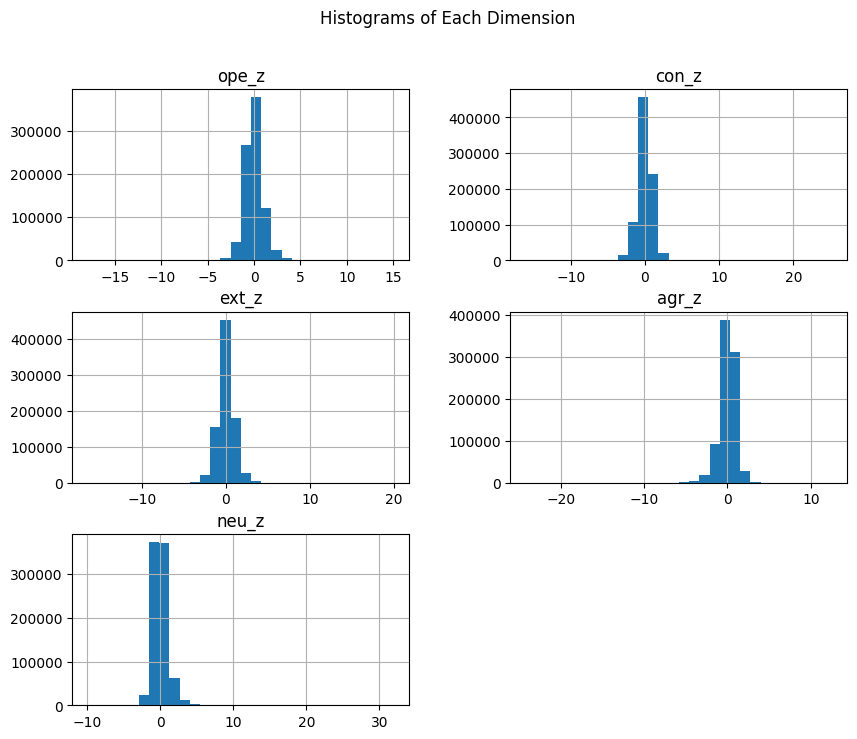

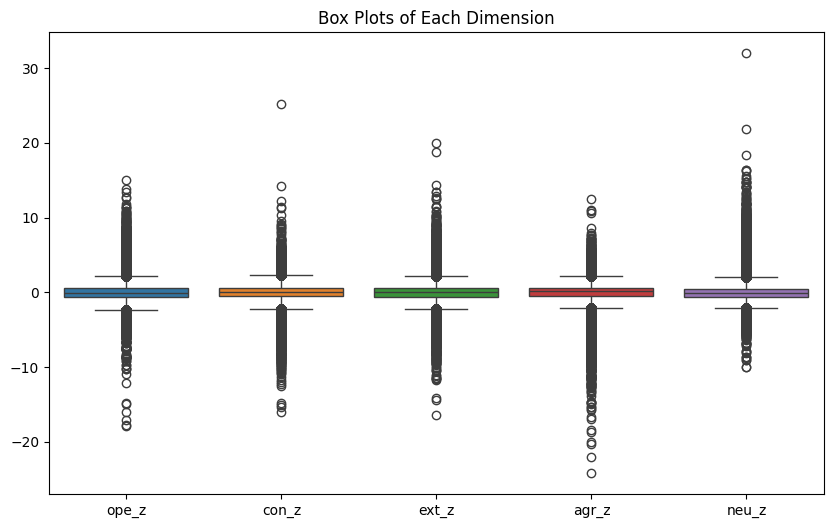

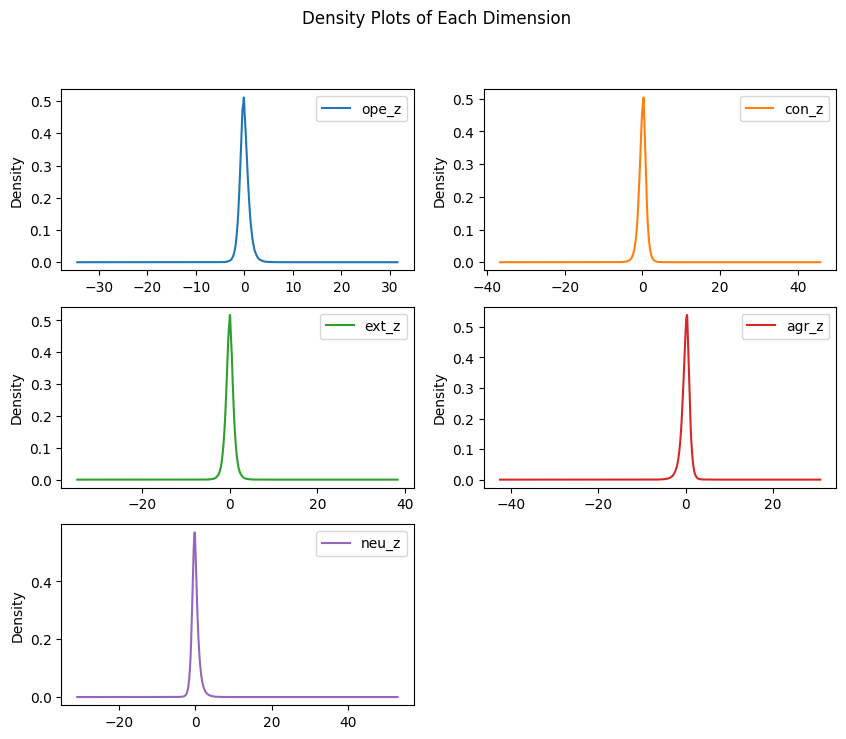

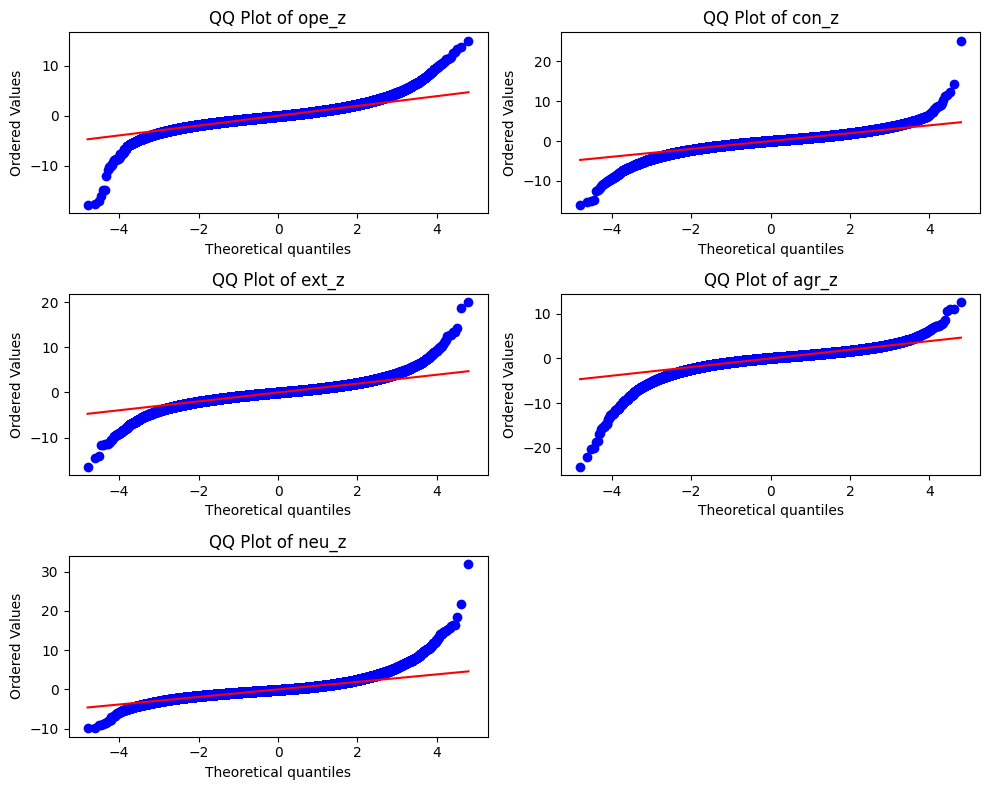

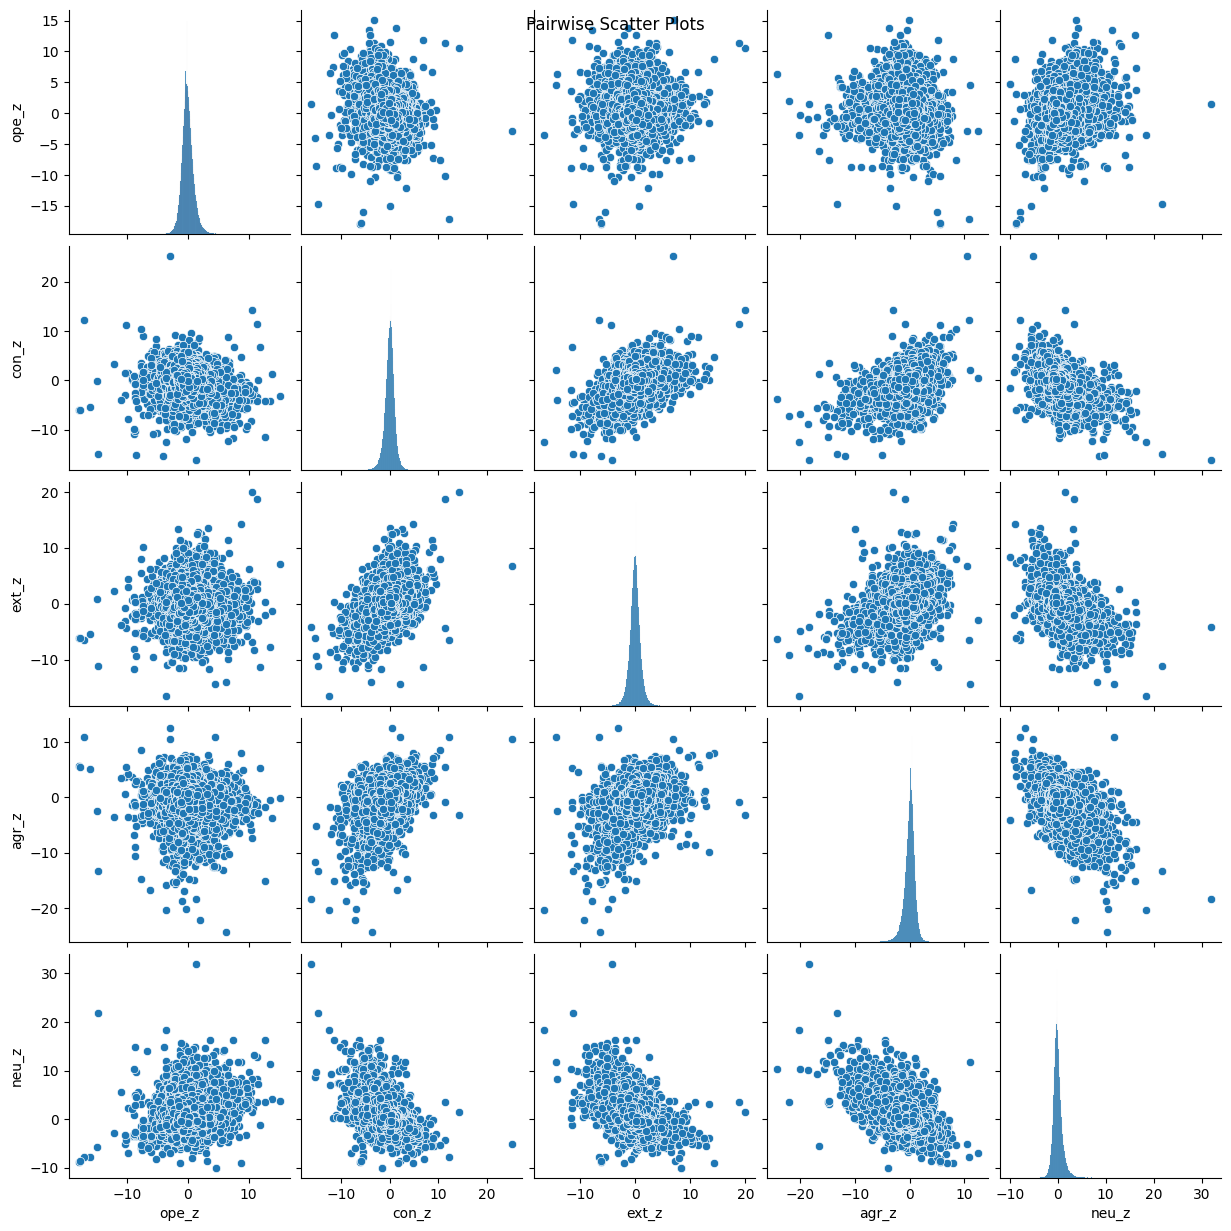

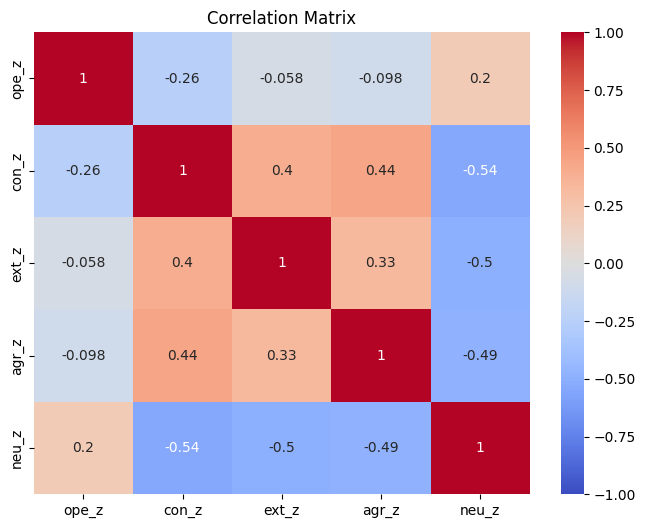

In [13]:
from scipy.stats import skew, kurtosis, probplot
import matplotlib.pyplot as plt
import seaborn as sns
# Descriptive Statistics
print(df.describe())
for col in df.columns:
    print(f"{col} - Skewness: {skew(df[col])}, Kurtosis: {kurtosis(df[col])}")

# Histograms
df.hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms of Each Dimension')
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plots of Each Dimension')
plt.show()

# Density Plots
df.plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 8))
plt.suptitle('Density Plots of Each Dimension')
plt.show()

# QQ Plots
plt.figure(figsize=(10, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 2, i+1)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}')
plt.tight_layout()
plt.show()

# Pairwise Scatter Plots
sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

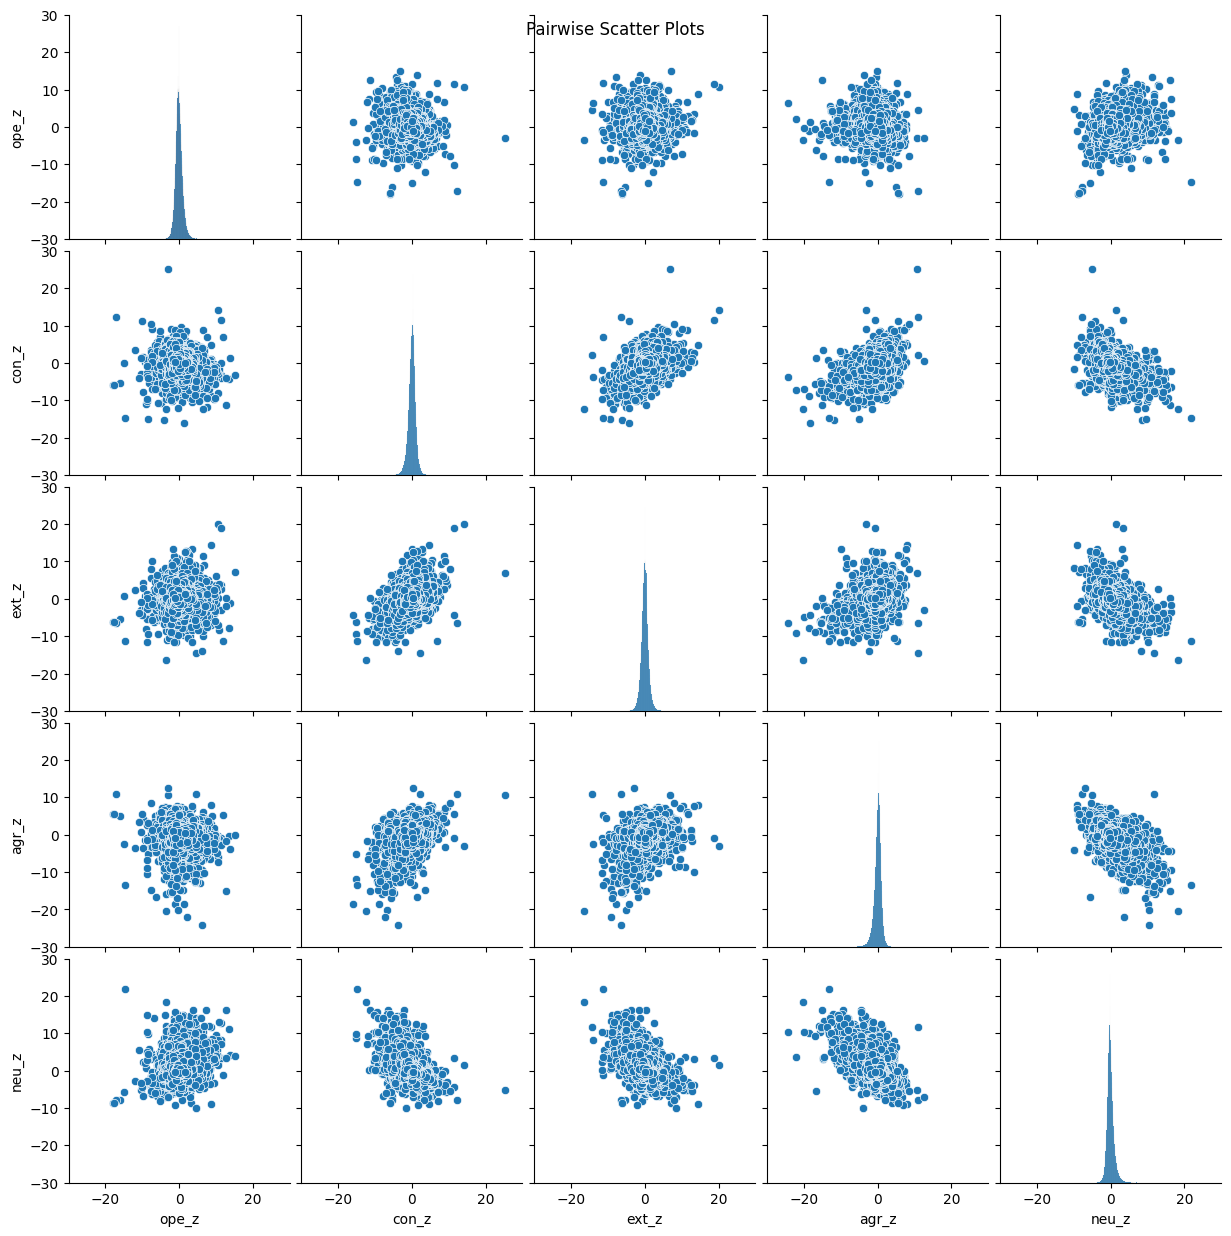

In [5]:
from scipy.stats import skew, kurtosis, probplot
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.pairplot(df)
for ax in g.axes.flatten():
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

In [ ]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [6]:
from nltk import word_tokenize
data_df['message_len'] = data_df['message'].apply(lambda x: len(word_tokenize(x)))

In [8]:
data_df['message_len'].describe()

count    846304.000000
mean         31.836953
std          33.870257
min           1.000000
25%          13.000000
50%          26.000000
75%          41.000000
max        4762.000000
Name: message_len, dtype: float64